In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
from sklearn import datasets
mydata = datasets.load_iris()
X = mydata.data[:,2:]
y = mydata.target

In [6]:
X.shape

(150, 2)

In [7]:
y.shape

(150,)

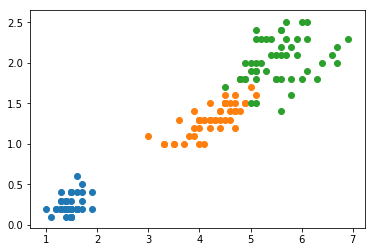

In [8]:
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.scatter(X[y==2, 0], X[y==2, 1])
plt.show()

# 调用sklearn.tree.DecisionTreeClassifier 对数据进行分类，其中用基尼系数对每个节点的数据进行划分

In [9]:
from sklearn.tree import DecisionTreeClassifier
tree_clf = DecisionTreeClassifier(max_depth=2) # 默认的criterion = ‘gini’,
tree_clf.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

绘制决策边界

In [10]:
def plot_decision_boundary(model, axis):
    x0, x1 = np.meshgrid(
        np.linspace(axis[0], axis[1], int((axis[1]-axis[0])*100)),
        np.linspace(axis[3], axis[2], int((axis[3]-axis[2])*100))
    )
    x_new = np.c_[x0.ravel(), x1.ravel()]
    
    y_predict = model.predict(x_new)
    ss = y_predict.reshape(x0.shape)
    
    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(['#EF9A9A', '#FFF59D', '#90CAF9'])
    
    plt.contourf(x0, x1, ss, linewidth=5, cmap=custom_cmap)

/home/crystal/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:967: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


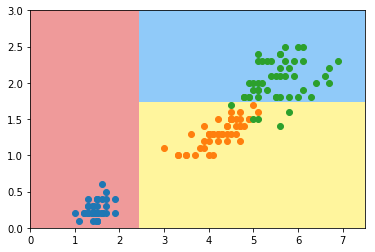

In [12]:
plot_decision_boundary(tree_clf, axis = [0, 7.5, 0, 3])
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.scatter(X[y==2, 0], X[y==2, 1])
plt.show()

可以看到，本例中用基尼系数 和 上小节用信息熵的方式对每一个节点进行划分得到的决策边界是一致的

# 模拟基尼系数进行划分

In [14]:
from collections import Counter
def split(X, y, d, value):
    index_l = X[:,d] <= value
    index_r = X[:,d] > value
    return X[index_l], X[index_r], y[index_l], y[index_r]

def gini(y):
    dict_y = Counter(y)
    res = 1
    for v in dict_y.values():
        p = v/len(y)
        res -= p**2
    return res

def try_split(X, y):
    best_d, best_value, best_gini = 0, 0, float('inf')
    for d in range(X.shape[1]):
        index_sorted = np.argsort(X[:,d])
        for i in range(1, len(X)):
            if X[index_sorted[i], d] != X[index_sorted[i-1], d]:
                value = (X[index_sorted[i], d] + X[index_sorted[i-1], d])/2
                X_l, X_r, y_l, y_r = split(X, y, d, value)
                gini_res = gini(y_l) + gini(y_r)
                if gini_res < best_gini:
                    best_d, best_value, best_gini = d, value, gini_res
    return best_d, best_value, best_gini
                
            

In [15]:
best_d, best_value, best_gini = try_split(X, y)
print('d:', best_d)
print('value:', best_value)
print('gini:', best_gini)

d: 0
value: 2.45
gini: 0.5


首先，在 x=2.45 处 对数据进行了分割，从图中也可以看出

In [16]:
X_l, X_r, y_l, y_r = split(X, y, best_d, best_value)

In [17]:
gini(y_l)

0.0

在 x = 2.45 的左侧，gini 系数为0,即是确定的    
从图中也可以看出，在x=2.45 的左侧，全部为蓝点，是确定的

In [18]:
gini(y_r)

0.5

在 x=2.45 的右侧， gini 系数为0.5, 有随机性    
从图中也可以看出, 在 x=2.45 的右侧, 有绿点 和黄点两类,故含有随机性

In [19]:
best_d1, best_value1, best_gini1 = try_split(X_r, y_r)
print('d1:', best_d1)
print('value1:', best_value1)
print('gini1:', best_gini1)

d1: 1
value1: 1.75
gini1: 0.2105714900645938


从图中也可以看到, 在y=1.75 时，又将 绿点和黄点分开了

In [20]:
X_l1, X_r1, y_l1, y_r1 = split(X_r, y_r, best_d1, best_value1)

In [21]:
gini(y_l1)

0.1680384087791495

In [22]:
gini(y_r1)

0.04253308128544431